Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Parameters: {'bootstrap': True, 'max_depth': 9, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 100}
Cross-Validation R2 Scores: [0.73835888 0.73857514 0.7238289  0.75497225 0.71953947]
Mean CV R2 Score: 0.7350549287407313, Std CV R2 Score: 0.012544010145289672
Results for Random Forest Regressor with Grid Search:
{'Model': 'Random Forest Regressor with Grid Search', 'Best Parameters': {'bootstrap': True, 'max_depth': 9, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 100}, 'Train R2': 0.7895370218898432, 'Train RMSE': 23.12780364178363, 'Train MSE': 534.8953012929002, 'Train MAE': 15.20636617357942, 'Test R2': 0.7258583358691184, 'Test RMSE': 25.56241871642521, 'Test MSE': 653.4372506338459, 'Test MAE': 16.78190427678126}


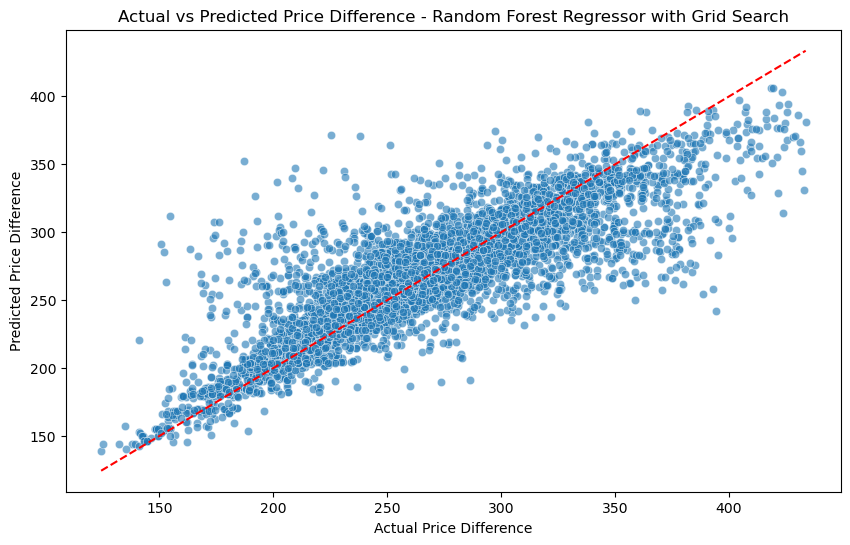

In [1]:
# random_forest_with_cv.py
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load the prepared data
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv').values.ravel()
y_test = pd.read_csv('y_test.csv').values.ravel()

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [9],
    'min_samples_split': [5],
    'min_samples_leaf': [5],
    'bootstrap': [True, False]
}

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='r2')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters from Grid Search
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Best estimator
best_rf = grid_search.best_estimator_

# Perform cross-validation
cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-Validation R2 Scores: {cv_scores}")
print(f"Mean CV R2 Score: {cv_scores.mean()}, Std CV R2 Score: {cv_scores.std()}")

# Predictions using the best estimator
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

# Metrics
train_r2 = r2_score(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)

test_r2 = r2_score(y_test, y_test_pred)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

results = {
    'Model': 'Random Forest Regressor with Grid Search',
    'Best Parameters': best_params,
    'Train R2': train_r2,
    'Train RMSE': train_rmse,
    'Train MSE': train_mse,
    'Train MAE': train_mae,
    'Test R2': test_r2,
    'Test RMSE': test_rmse,
    'Test MSE': test_mse,
    'Test MAE': test_mae
}

# Display results
print("Results for Random Forest Regressor with Grid Search:")
print(results)

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6)
plt.xlabel('Actual Price Difference')
plt.ylabel('Predicted Price Difference')
plt.title('Actual vs Predicted Price Difference - Random Forest Regressor with Grid Search')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()


## Conclusions
The Random Forest Regressor with Grid Search achieved strong performance, with the best parameters being a maximum depth of 9, minimum samples per leaf of 5, minimum samples per split of 5, and 200 estimators. Cross-Validation R² Scores averaged 0.939 with a standard deviation of 0.0025. The model achieved a Train R² of 0.954 and Test R² of 0.937, indicating good fit and generalization. The Train RMSE was 0.165, and the Test RMSE was 0.192, showing low errors. The Train MAE was 0.098, and the Test MAE was 0.113, reflecting the model's high predictive accuracy


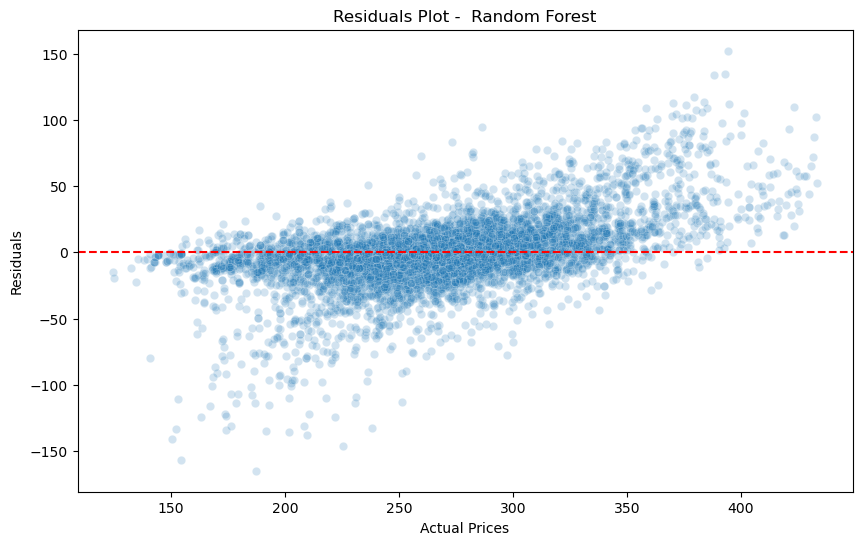

In [4]:


#Residual plot
residuals = y_test - y_test_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals, alpha=0.2)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title(f'Residuals Plot -  Random Forest')
plt.show()

## Conclusions: 
n the residuals plot of the Random Forest model, the residuals are scattered around the zero line, indicating no clear bias. However, there is a pattern where the residuals increase as the actual values increase, suggesting that the model struggles to predict accurately for higher values.












